# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Circular Array Antenna
***

The circular array is shown in Figure 3.22.  For this type of array, the radiating elements are placed on a circular path with spacing of $a \, \Delta\phi$, where $a$ is the radius, and $\Delta\phi$ is the angular difference between the elements.  The normalized electric field is written as

$$
	E(r, \theta, \phi) = \sum\limits_{n=1}^{N}a_n\, \frac{e^{-j k r_n}}{r_n} \hspace{0.5in} \text{(V/m)},
$$

where

$$
	r_n = \sqrt{r^2 + a^2 - 2\, a\, r\, \cos \psi_n} \hspace{0.5in} \text{(m)}.
$$

For phase terms, $r_n$ is approximated by

$$
	r_n \approx r - a\, \sin\theta\, \cos(\phi - \phi_n) \hspace{0.5in} \text{(m)},
$$

where $\phi_n$ is the angular position of the $n$th element, and is expressed as

\begin{equation}
	\phi_n = \frac{2\pi\, n}{N} \hspace{0.5in} \text{(rad)},
\end{equation}

and for amplitude $r_n \approx r$.  The coefficients, $a_n$, are represented by an amplitude and phase as

$$
	a_n = A_n\, e^{j \alpha_n},
$$

where $A_n$ is the amplitude and $\alpha_n$ is the phase.  The array factor for the circular array is now written as

$$
	{AF}(\theta, \phi) = \sum\limits_{n=1}^{N}A_n\, e^{j [k a \sin\theta\, \cos(\phi-\phi_n) + \alpha_n]} .
$$
***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz), the number of elements, the scan angle (theta - degrees), (phi - degrees), and the radius (m)

In [2]:
frequency = 300e6

number_of_elements = 40.0

scan_angle_theta = 30.0

scan_angle_phi = 30.0

radius = 1.1

Set up the theta and phi arrays using the `meshgrid` and `linspace` routines from `scipy`

In [3]:
from numpy import linspace, meshgrid, radians

from scipy.constants import pi


n = 360

m = int(n / 8)

theta, phi = meshgrid(linspace(0.0 * pi, 0.5 * pi, n), linspace(0.0, 2.0 * pi, n))

Set up the keyword args

In [4]:
kwargs = {'number_of_elements': number_of_elements,

          'scan_angle_theta': radians(scan_angle_theta),

          'scan_angle_phi': radians(scan_angle_phi),

          'radius': radius,

          'frequency': frequency,

          'theta': theta,

          'phi': phi}

Calculate the array factor using the `circular_uniform` routines

In [5]:
from Libs.antenna.array import circular_uniform

af = circular_uniform.array_factor(**kwargs)

Create the U-V coordinates for displaying the antenna pattern

In [6]:
from numpy import sin, cos

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Create the color plot of the array factor using the `matplotlib` routines

Text(0.5, 1.0, 'Circular Array - Array Factor')

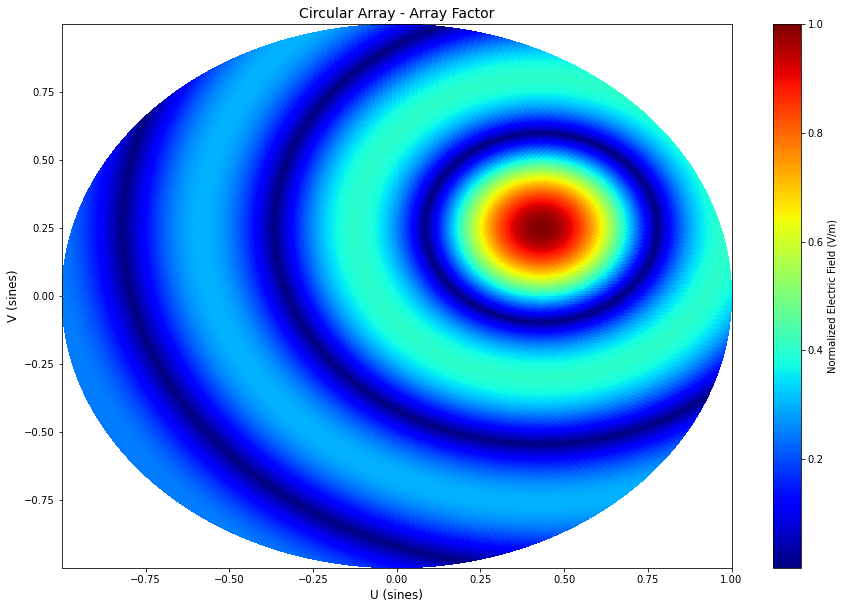

In [7]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Set up the axes

fig, axes1 = plt.subplots()



im = axes1.pcolor(uu, vv, abs(af), cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field (V/m)", size=10)



# Set the x- and y-axis labels

axes1.set_xlabel("U (sines)", size=12)

axes1.set_ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Array - Array Factor', size=14)

Create the contour plot using the `matplotlib` routines

Text(0.5, 1.0, 'Circular Array - Array Factor')

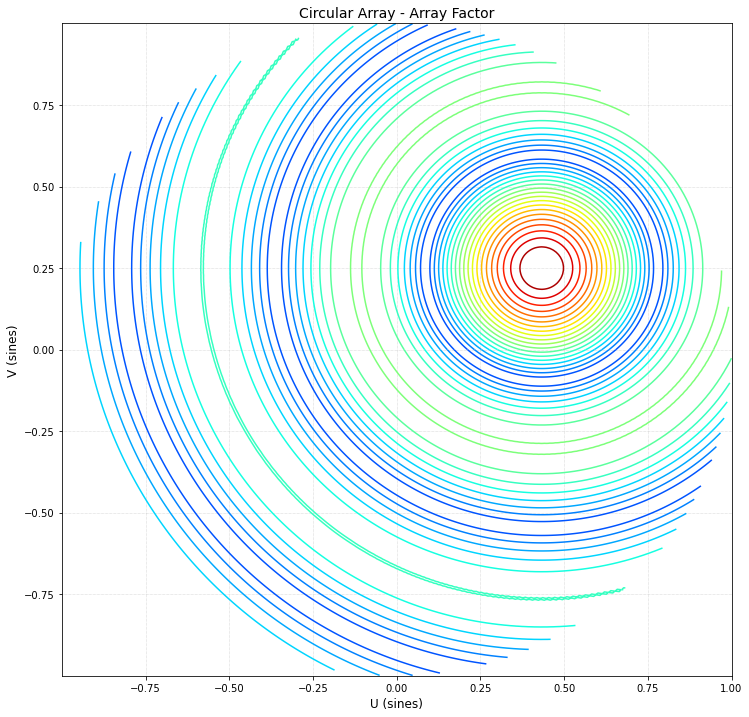

In [8]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)

plt.contour(uu, vv, abs(af), 20, cmap="jet", vmin=-0.2, vmax=1.0)

plt.grid(linestyle=':', linewidth=0.5)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Array - Array Factor', size=14)

Create the line plot using the `matplotlib` routines

Text(0.5, 1.0, 'Circular Array - Array Factor')

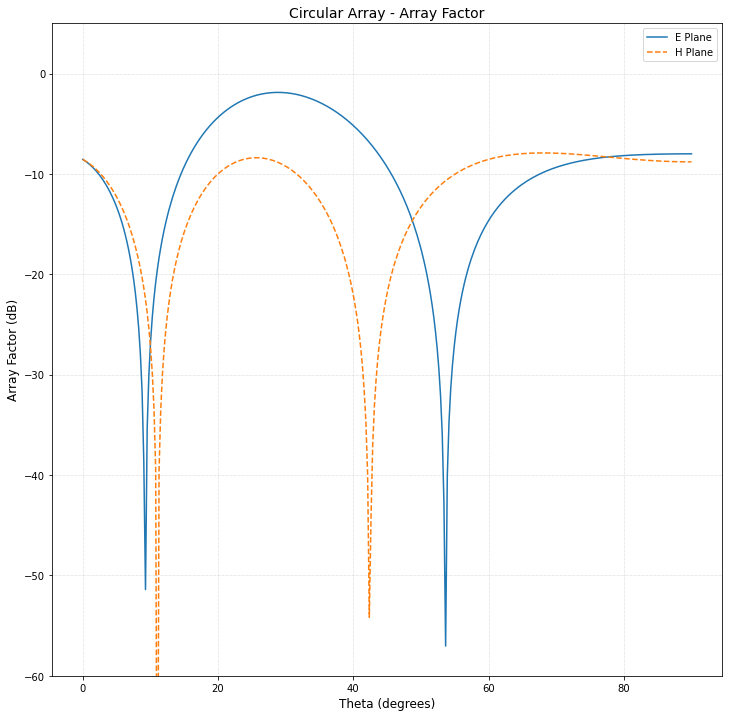

In [9]:
from numpy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(abs(af[m])), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(abs(af[0])), '--', label='H Plane')



# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Array Factor (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title

plt.title('Circular Array - Array Factor', size=14)